In [2]:
# Import important libraries
import numpy as np
import pandas as pd
import openpyxl
import os
import warnings
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Point

warnings.simplefilter('ignore')

# Merging HTML dataframes into 1 dataset

The first step was to merge all the different HTML files into 1 dataset. First, one html file was loaded to check the syntax of the file. Second, a function was made to load all the files and merge them into 1 dataframe.

In [3]:
# Get path and open the file.
path = os.getcwd()
road_html = path + "\\All_traffic_htm\\N1.traffic.htm"

# Transform the data into a dataframe. The fourth part [4] is used, since that was the correct syntax of the dataframe.
data = []
df = pd.read_html(road_html)[4]
data.append(df)
r_roads = pd.concat(data, ignore_index=True)

r_roads

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,List of links of N1 ( what is a link ),List of links of N1 ( what is a link ),List of links of N1 ( what is a link ),List of links of N1 ( what is a link ),List of links of N1 ( what is a link ),List of links of N1 ( what is a link ),List of links of N1 ( what is a link ),List of links of N1 ( what is a link ),List of links of N1 ( what is a link ),List of links of N1 ( what is a link ),...,List of links of N1 ( what is a link ),List of links of N1 ( what is a link ),List of links of N1 ( what is a link ),List of links of N1 ( what is a link ),List of links of N1 ( what is a link ),List of links of N1 ( what is a link ),List of links of N1 ( what is a link ),List of links of N1 ( what is a link ),List of links of N1 ( what is a link ),List of links of N1 ( what is a link )
1,Link no,Name,Start location,Start location,Start location,End location,End location,End location,Length,Traffic Data,...,Traffic Data,Traffic Data,Traffic Data,Traffic Data,Traffic Data,Traffic Data,Total,Total,Total,Traffic
2,NaN,NaN,LRP,Offset,Chainage,LRP,Offset,Chainage,(Km),Heavy Truck,...,Car,Auto Rickshaw,Motor Cycle,Bi-Cycle,Cycle Rickshaw,Cart,Motorized,Non Motorized,Total AADT,(AADT)
3,N1-1L,Jatrabari - Int.with Z1101 (Left) (Left),LRPS,0,0,LRPS,822,0.822,0.822,402.0,...,1851.0,2980.0,398.0,232.0,889.0,0.0,18236.0,1121.0,19357.0,19357.0
4,N1-1R,Jatrabari - Int.with Z1101 (Left) (Right),LRPS,0,0,LRPS,822,0.822,0.822,660.0,...,2608.0,2508.0,436.0,213.0,1088.0,0.0,20236.0,1301.0,21537.0,21537.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,N1-65,Coxsbazar Link Road N110-Maricha Z1009,LRP386,724,381.481,LRP403,217,398.205,16.724,24.0,...,142.0,2476.0,419.0,97.0,1042.0,0.0,4681.0,1139.0,5820.0,5820.0
104,N1-66,Maricha Z1009-Ukhia Dakbanglo Z1503,LRP403,217,398.205,LRP413,300,408.434,10.229,24.0,...,142.0,2476.0,419.0,97.0,1042.0,0.0,4681.0,1139.0,5820.0,5820.0
105,N1-67,Ukhia Dakbanglo Z1503 - Gundum Z1504,LRP413,300,408.434,LRP420,900,416.044,7.610,24.0,...,142.0,2476.0,419.0,97.0,1042.0,0.0,4681.0,1139.0,5820.0,5820.0
106,N1-68,GundumGundum Z1504 - Whykong Z1133,LRP420,900,416.044,LRP433,521,428.908,12.864,24.0,...,142.0,2476.0,419.0,97.0,1042.0,0.0,4681.0,1139.0,5820.0,5820.0


When looking at the dataframe above, it is seen that there are three "useless" rows at the top. Those indicate the column names and titles in the HTML files. When merging all the files, it should be kept in mind to delete those.

In [4]:
# Function to read all the HTML files of the N and R roads, and merge them into one dataframe. 
def load_traffic_data(letter, start, end):
    data_list = []
    path = os.getcwd()
    
    # Loop through all the possible N and R roads in a range
    for i in range(start, end + 1):
        road_html = f"{path}\\All_traffic_htm\\{letter}{i}.traffic.htm"
        
        # Try to load the data (if the HTML file for the road combination exists), otherwise continue
        try:
            df = pd.read_html(road_html)[4]
            data_list.append(df)
            #print(i)
            
        except:
            continue
            
    #Put all data in a dataframe
    data_df = pd.concat(data_list, ignore_index=True)
    return data_df

# Load the function for all N roads and R roads
n_roads = load_traffic_data('N', 1, 809)
r_roads = load_traffic_data('R', 1, 892)

# Concat the N-roads and R-roads into 1 dataframe
all_roads = pd.concat([n_roads, r_roads], ignore_index=True)

As seen in the example HTML dataframe in the beginning, the top three rows of every html dataset are "useless". We merged all the HTML files together, which results in a lot of "useless" rows at the start of a new road. This is done in three steps:
1. The first rows of the first HTML file are used to set column names, the rest of those three columns throughout the dataset should be deleted. 
2. All rows containing the word "links" in their "start location LRP" column should be deleted, since this is the first row of the separate HTML files
3. Furthermore, all roads which represent the HTML column names should be deleted. For each HTML file, they were the same, therefore it was possible to drop_duplicates().

In [5]:
# Set column names and the first three rows.
all_roads.columns = all_roads.iloc[1] + " " + all_roads.iloc[2]
allroads = all_roads.drop(all_roads.index[0:3])

In [6]:
# Drop columns which contain "links".
drop_rows = allroads[allroads['Start location LRP'].str.contains("links")].index
df_cleaned = allroads.drop(drop_rows)

# Drop duplicates.
df_cleaned = df_cleaned.drop_duplicates()

In [7]:
allroads

,NaN,NaN,Start location LRP,Start location Offset,Start location Chainage,End location LRP,End location Offset,End location Chainage,Length (Km),Traffic Data Heavy Truck,...,Traffic Data Car,Traffic Data Auto Rickshaw,Traffic Data Motor Cycle,Traffic Data Bi-Cycle,Traffic Data Cycle Rickshaw,Traffic Data Cart,Total Motorized,Total Non Motorized,Total Total AADT,Traffic (AADT)
3,N1-1L,Jatrabari - Int.with Z1101 (Left) (Left),LRPS,0,0,LRPS,822,0.822,0.822,402.0,...,1851.0,2980.0,398.0,232.0,889.0,0.0,18236.0,1121.0,19357.0,19357.0
4,N1-1R,Jatrabari - Int.with Z1101 (Left) (Right),LRPS,0,0,LRPS,822,0.822,0.822,660.0,...,2608.0,2508.0,436.0,213.0,1088.0,0.0,20236.0,1301.0,21537.0,21537.0
5,N1-2L,Int.with Z1101 - Signboard (Left) R111 (Left),LRPS,822,0.822,LRPS,4175,4.175,3.353,660.0,...,2608.0,2508.0,436.0,213.0,1088.0,0.0,20236.0,1301.0,21537.0,21537.0
6,N1-2R,Int.with Z1101 - Signboard (Left) R111 (Right),LRPS,822,0.822,LRPS,4175,4.175,3.353,402.0,...,1851.0,2980.0,398.0,232.0,889.0,0.0,18236.0,1121.0,19357.0,19357.0
7,N1-3L,Signboard - Shimrail (Left)R110 (Left),LRPS,4175,4.175,LRPS,7181,7.181,3.006,91.0,...,1690.0,2266.0,1087.0,75.0,1198.0,0.0,16288.0,1273.0,17561.0,17561.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,R890-6,"Char Fession (int.with Z8909)-Baburhat, Lunch ...",LRP072,990,73.78,LRPE,0,108.785,35.005,3.0,...,63.0,1119.0,1009.0,692.0,774.0,0.0,3010.0,1466.0,4476.0,4476.0
1714,List of links of R891 ( what is a link ),List of links of R891 ( what is a link ),List of links of R891 ( what is a link ),List of links of R891 ( what is a link ),List of links of R891 ( what is a link ),List of links of R891 ( what is a link ),List of links of R891 ( what is a link ),List of links of R891 ( what is a link ),List of links of R891 ( what is a link ),List of links of R891 ( what is a link ),...,List of links of R891 ( what is a link ),List of links of R891 ( what is a link ),List of links of R891 ( what is a link ),List of links of R891 ( what is a link ),List of links of R891 ( what is a link ),List of links of R891 ( what is a link ),List of links of R891 ( what is a link ),List of links of R891 ( what is a link ),List of links of R891 ( what is a link ),List of links of R891 ( what is a link )
1715,Link no,Name,Start location,Start location,Start location,End location,End location,End location,Length,Traffic Data,...,Traffic Data,Traffic Data,Traffic Data,Traffic Data,Traffic Data,Traffic Data,Total,Total,Total,Traffic
1716,NaN,NaN,LRP,Offset,Chainage,LRP,Offset,Chainage,(Km),Heavy Truck,...,Car,Auto Rickshaw,Motor Cycle,Bi-Cycle,Cycle Rickshaw,Cart,Motorized,Non Motorized,Total AADT,(AADT)


Due to this method and using drop_duplicates,there was still one road left with the column names in the dataset. These two rows should also be deleted

In [8]:
# Drop the row with a NaN value
df_cleaned = df_cleaned.dropna()

# Drop the row were "location" is used in the start location LRP column
drop_rows2 = df_cleaned[df_cleaned['Start location LRP'].str.contains("location")].index
df_cleaned = df_cleaned.drop(drop_rows2)

In [9]:
# Export the dataframe as csv file
df_cleaned.to_csv("output_all_datasets_3.csv")

# Concat HTML data, road data and Bridges data

## Preparing HTML data

Before merging the HTML dataframe with the other dataframes, a few things needed to be changed:
1. Change column names for END LOCATION chainage and (traffic AADT). These are the ones we are going to use while merging with the road and bridge data. And therefore should match with those column names
2. Rename the first two columns. They do not have a name now
3. Create a new column for "road", were only the road name is displayed
4. Select only the rows we need: road, chainage, AADT

In [10]:
# Change column names
df_cleaned = df_cleaned.rename(columns = {"End location Chainage":"chainage","Traffic (AADT)":"AADT"})
df_cleaned.columns.values[0] = "road_name"
df_cleaned.columns.values[1] = "Intersection_name"

# Create road column with the road name
df_cleaned['road'] = df_cleaned["road_name"].str.split('-').str[0]
df_cleaned

,road_name,Intersection_name,Start location LRP,Start location Offset,Start location Chainage,End location LRP,End location Offset,chainage,Length (Km),Traffic Data Heavy Truck,...,Traffic Data Auto Rickshaw,Traffic Data Motor Cycle,Traffic Data Bi-Cycle,Traffic Data Cycle Rickshaw,Traffic Data Cart,Total Motorized,Total Non Motorized,Total Total AADT,AADT,road
3,N1-1L,Jatrabari - Int.with Z1101 (Left) (Left),LRPS,0,0,LRPS,822,0.822,0.822,402.0,...,2980.0,398.0,232.0,889.0,0.0,18236.0,1121.0,19357.0,19357.0,N1
4,N1-1R,Jatrabari - Int.with Z1101 (Left) (Right),LRPS,0,0,LRPS,822,0.822,0.822,660.0,...,2508.0,436.0,213.0,1088.0,0.0,20236.0,1301.0,21537.0,21537.0,N1
5,N1-2L,Int.with Z1101 - Signboard (Left) R111 (Left),LRPS,822,0.822,LRPS,4175,4.175,3.353,660.0,...,2508.0,436.0,213.0,1088.0,0.0,20236.0,1301.0,21537.0,21537.0,N1
6,N1-2R,Int.with Z1101 - Signboard (Left) R111 (Right),LRPS,822,0.822,LRPS,4175,4.175,3.353,402.0,...,2980.0,398.0,232.0,889.0,0.0,18236.0,1121.0,19357.0,19357.0,N1
7,N1-3L,Signboard - Shimrail (Left)R110 (Left),LRPS,4175,4.175,LRPS,7181,7.181,3.006,91.0,...,2266.0,1087.0,75.0,1198.0,0.0,16288.0,1273.0,17561.0,17561.0,N1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,R890-3,Banglabazar-Kungerhat (int.with Z8943),LRP016,855,16.885,LRP041,320,41.62,24.735,6.0,...,1262.0,1165.0,460.0,300.0,0.0,2953.0,760.0,3713.0,3713.0,R890
1711,R890-4,Kungerhat(int.with Z8943)-Lalmohon(int.with Z8...,LRP041,320,41.62,LRP052,610,53.04,11.420,3.0,...,1119.0,1009.0,692.0,774.0,0.0,3010.0,1466.0,4476.0,4476.0,R890
1712,R890-5,Lalmohon(int.with Z8913)-Char Fession (int.wit...,LRP052,610,53.04,LRP072,990,73.78,20.740,3.0,...,1119.0,1009.0,692.0,774.0,0.0,3010.0,1466.0,4476.0,4476.0,R890
1713,R890-6,"Char Fession (int.with Z8909)-Baburhat, Lunch ...",LRP072,990,73.78,LRPE,0,108.785,35.005,3.0,...,1119.0,1009.0,692.0,774.0,0.0,3010.0,1466.0,4476.0,4476.0,R890


In [11]:
# Select only the columns we need 
all_roads_df2 = df_cleaned[['road', 'chainage', 'AADT']]
all_roads_df2

,road,chainage,AADT
3,N1,0.822,19357.0
4,N1,0.822,21537.0
5,N1,4.175,21537.0
6,N1,4.175,19357.0
7,N1,7.181,17561.0
...,...,...,...
1710,R890,41.62,3713.0
1711,R890,53.04,4476.0
1712,R890,73.78,4476.0
1713,R890,108.785,4476.0


For the N1, there is a right and left part of the road, indicated by the (l) and (r) in the road_name column of the df_cleaned dataset. We decided to take the average AADT of these two road segments. This is done by calculating the mean AADT if the road and chainage is the same. Afterwards, the duplicates are removed. 

In [12]:
# Convert 'AADT' column to numeric data type.
all_roads_df2['AADT'] = pd.to_numeric(all_roads_df2['AADT'], errors='coerce')

# Group by 'road' and 'chainage', calculate mean of 'AADT' for each group.
df_grouped = all_roads_df2.groupby(['road', 'chainage'])['AADT'].transform('mean')

# Update 'AADT' column with the calculated mean values.
all_roads_df2['AADT'] = df_grouped

all_roads_df2


,road,chainage,AADT
3,N1,0.822,20447.0
4,N1,0.822,20447.0
5,N1,4.175,20447.0
6,N1,4.175,20447.0
7,N1,7.181,17109.0
...,...,...,...
1710,R890,41.62,3713.0
1711,R890,53.04,4476.0
1712,R890,73.78,4476.0
1713,R890,108.785,4476.0


In [13]:
# Remove duplicates based on values in three columns
df_no_duplicates = all_roads_df2.drop_duplicates(subset=['road', 'chainage', 'AADT'], keep='first')

df_no_duplicates


,road,chainage,AADT
3,N1,0.822,20447.0
5,N1,4.175,20447.0
7,N1,7.181,17109.0
9,N1,8.763,17666.5
11,N1,11.936,24234.0
...,...,...,...
1710,R890,41.62,3713.0
1711,R890,53.04,4476.0
1712,R890,73.78,4476.0
1713,R890,108.785,4476.0


In [14]:
df_no_duplicates = df_no_duplicates.astype({'chainage': 'float64'})
df_no_duplicates

,road,chainage,AADT
3,N1,0.822,20447.0
5,N1,4.175,20447.0
7,N1,7.181,17109.0
9,N1,8.763,17666.5
11,N1,11.936,24234.0
...,...,...,...
1710,R890,41.620,3713.0
1711,R890,53.040,4476.0
1712,R890,73.780,4476.0
1713,R890,108.785,4476.0


## Preparing Road dataset

By preparing the road dataset, only certain columns need to be selected. Furthermore, a new column called "model_type" is added, to show this is data about links, not about bridges.

In [15]:
# Read the road data
roads_df = pd.read_csv(path + '\\_roads3.csv')
roads_df


,road,chainage,lrp,lat,lon,gap,type,name
0,N1,0.000,LRPS,23.706028,90.443333,NaN,Others,Start of Road after Jatrabari Flyover infront...
1,N1,0.814,LRPSa,23.702917,90.450417,NaN,Culvert,Box Culvert
2,N1,0.822,LRPSb,23.702778,90.450472,NaN,CrossRoad,Intersection with Z1101
3,N1,1.000,LRP001,23.702139,90.451972,NaN,KmPost,Km post missing
4,N1,2.000,LRP002,23.697889,90.460583,NaN,KmPost,Km post missing
...,...,...,...,...,...,...,...,...
51343,Z8943,7.000,LRP007,22.429499,90.785722,NaN,KmPost,Km Post Missing
51344,Z8943,8.000,LRP008,22.430110,90.776333,NaN,KmPost,Km Post Missing
51345,Z8943,8.133,LRP008a,22.430249,90.774888,BS,Bridge,Start of Bridge
51346,Z8943,8.151,LRP008b,22.430249,90.774860,BE,Bridge,End of Bridge


In [16]:
roads_df1 = roads_df.copy()

# Drop all columns except 'road', 'lrp', 'chainage', 'lat', 'lon' , 'name'
roads_df1 = roads_df1[['road', 'lrp', 'chainage', 'lat', 'lon', 'name']]

roads_df1

,road,lrp,chainage,lat,lon,name
0,N1,LRPS,0.000,23.706028,90.443333,Start of Road after Jatrabari Flyover infront...
1,N1,LRPSa,0.814,23.702917,90.450417,Box Culvert
2,N1,LRPSb,0.822,23.702778,90.450472,Intersection with Z1101
3,N1,LRP001,1.000,23.702139,90.451972,Km post missing
4,N1,LRP002,2.000,23.697889,90.460583,Km post missing
...,...,...,...,...,...,...
51343,Z8943,LRP007,7.000,22.429499,90.785722,Km Post Missing
51344,Z8943,LRP008,8.000,22.430110,90.776333,Km Post Missing
51345,Z8943,LRP008a,8.133,22.430249,90.774888,Start of Bridge
51346,Z8943,LRP008b,8.151,22.430249,90.774860,End of Bridge


In [17]:
# Add a new column "model_type" and assign the value "link" to all rows
roads_df1['model_type'] = 'link'

roads_df1

,road,lrp,chainage,lat,lon,name,model_type
0,N1,LRPS,0.000,23.706028,90.443333,Start of Road after Jatrabari Flyover infront...,link
1,N1,LRPSa,0.814,23.702917,90.450417,Box Culvert,link
2,N1,LRPSb,0.822,23.702778,90.450472,Intersection with Z1101,link
3,N1,LRP001,1.000,23.702139,90.451972,Km post missing,link
4,N1,LRP002,2.000,23.697889,90.460583,Km post missing,link
...,...,...,...,...,...,...,...
51343,Z8943,LRP007,7.000,22.429499,90.785722,Km Post Missing,link
51344,Z8943,LRP008,8.000,22.430110,90.776333,Km Post Missing,link
51345,Z8943,LRP008a,8.133,22.430249,90.774888,Start of Bridge,link
51346,Z8943,LRP008b,8.151,22.430249,90.774860,End of Bridge,link


## Merging Road dataset and HTML dataset

In [18]:
#Merging dataframes based on certain columns
merged_df = pd.merge(df_no_duplicates, roads_df1, on=['road', 'chainage'], how='inner')
merged_df

,road,chainage,AADT,lrp,lat,lon,name,model_type
0,N1,0.822,20447.0,LRPSb,23.702778,90.450472,Intersection with Z1101,link
1,N1,4.175,20447.0,LRP004a,23.693805,90.480527,Road to Narayanganj(R111),link
2,N1,7.181,17109.0,LRP007a,23.697916,90.509278,"R110,Left to Demra, Right to Narayanganj",link
3,N1,8.763,17666.5,LRP009a,23.706083,90.521527,Road to Sylhet (N2),link
4,N1,11.936,24234.0,LRP012c,23.690416,90.546583,Right to Syedpur (R113) left to Joydebpur N105),link
...,...,...,...,...,...,...,...,...
879,R890,16.885,3713.0,LRP016c,22.590194,90.658778,Z 8915,link
880,R890,41.620,3713.0,LRP041a,22.430138,90.768805,Left Z 8943,link
881,R890,53.040,4476.0,LRP052b,22.340416,90.734750,Z 8913,link
882,R890,73.780,4476.0,LRP072b,22.185805,90.760167,Left Z 8909,link


To make it possible to merge with the bridge dataset, an extra column called "condition" needs to be added. This is set as a nan value, since roads do not have a condition during this assignment.

In [19]:
# Add a new column
merged_df['condition'] = np.nan

merged_df

,road,chainage,AADT,lrp,lat,lon,name,model_type,condition
0,N1,0.822,20447.0,LRPSb,23.702778,90.450472,Intersection with Z1101,link,NaN
1,N1,4.175,20447.0,LRP004a,23.693805,90.480527,Road to Narayanganj(R111),link,NaN
2,N1,7.181,17109.0,LRP007a,23.697916,90.509278,"R110,Left to Demra, Right to Narayanganj",link,NaN
3,N1,8.763,17666.5,LRP009a,23.706083,90.521527,Road to Sylhet (N2),link,NaN
4,N1,11.936,24234.0,LRP012c,23.690416,90.546583,Right to Syedpur (R113) left to Joydebpur N105),link,NaN
...,...,...,...,...,...,...,...,...,...
879,R890,16.885,3713.0,LRP016c,22.590194,90.658778,Z 8915,link,NaN
880,R890,41.620,3713.0,LRP041a,22.430138,90.768805,Left Z 8943,link,NaN
881,R890,53.040,4476.0,LRP052b,22.340416,90.734750,Z 8913,link,NaN
882,R890,73.780,4476.0,LRP072b,22.185805,90.760167,Left Z 8909,link,NaN


## Preparing bridges dataset

To prepare the bridges dataset, a few steps need to be taken:
1. Drop the "name" column. There is in the road/html dataset a column called "name", which refers to the road name. The "name" column in the bridges dataset refers to the bridge name instead of the road name.
2. Rename columns to match with the road/html
3. Add a column called "model_type" and set this to bridge
4. Only select the columns we need
5. Add a AADT column and set the values to NaN. This is a column in the road/html dataset, and otherwise it is not possible to merge.
6. Only select the bridges in the N and R roads, since this is the scope of our assignment

In [20]:
# Read dataset.
bridges_df = pd.read_excel(path + "\\UPDATED_BMMS_overview.xlsx")
bridges_df


,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
0,N1,1.800,Box Culvert,LRP001a,.,11.30,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.800,19.5,2005.0,2.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.698739,90.458861,interpolate
1,N1,4.925,Box Culvert,LRP004b,.,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,35.4,2006.0,1.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.694664,90.487775,interpolate
2,N1,8.976,PC Girder Bridge,LRP008b,Kanch pur Bridge.,394.23,A,119889,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,8.976,NaN,NaN,NaN,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.705060,90.523214,interpolate
3,N1,10.880,Box Culvert,LRP010b,NOYAPARA CULVERT,6.30,A,112531,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.880,12.2,1992.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.694391,90.537574,interpolate
4,N1,10.897,Box Culvert,LRP010c,ADUPUR CULVERT,6.30,A,112532,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.897,12.2,1984.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.694302,90.537707,interpolate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20410,Z8806,83.728,Box Culvert,LRP083a,.,1.78,D,110470,Lebukhali-Dumki-Boga-Bauphal-Kalaiya-Dashmina-...,83.728,7.6,1980.0,1.0,Barisal,Patuakhali,Barguna,Barguna,22.183448,90.299962,interpolate
20411,Z8810,3.981,Steel Beam & RCC Slab,LRP003b,.,27.20,D,113458,Bakerganj-Padrishibpur-Kathaltali-Subidkhali-B...,3.981,3.2,1979.0,5.0,Barisal,Barisal,Barisal,Barisal-1,22.519353,90.310063,interpolate
20412,Z8814,20.730,Baily with Steel Deck,LRP020b,Kalbari Bridge,30.50,D,121147,Barguna (Dakhin Ramna Kheya Ghat)-Dewatala-Mat...,20.730,NaN,NaN,NaN,Barisal,Barisal,Pirojpur,Kawkhali,22.282704,89.968512,interpolate
20413,Z8910,28.880,RCC Girder Bridge,LRP028a,Narainpur Bridge,9.50,D,119249,Barisal (Bairagirpool)-Tumchar-Bauphaul Road,28.880,NaN,NaN,NaN,Barisal,Patuakhali,Patuakhali,Patuakhali,22.510650,90.535314,interpolate


In [21]:
# Drop the column "name", we do not need that one during this assignment
bridges_df = bridges_df.drop(columns = [ 'name'])

In [22]:
# Rename columns, to make it possible to merge
bridges_df.rename(columns={'LRPName': 'lrp', 'roadName': 'name'}, inplace=True)
bridges_df

,road,km,type,lrp,length,condition,structureNr,name,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
0,N1,1.800,Box Culvert,LRP001a,11.30,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.800,19.5,2005.0,2.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.698739,90.458861,interpolate
1,N1,4.925,Box Culvert,LRP004b,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,35.4,2006.0,1.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.694664,90.487775,interpolate
2,N1,8.976,PC Girder Bridge,LRP008b,394.23,A,119889,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,8.976,NaN,NaN,NaN,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.705060,90.523214,interpolate
3,N1,10.880,Box Culvert,LRP010b,6.30,A,112531,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.880,12.2,1992.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.694391,90.537574,interpolate
4,N1,10.897,Box Culvert,LRP010c,6.30,A,112532,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.897,12.2,1984.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.694302,90.537707,interpolate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20410,Z8806,83.728,Box Culvert,LRP083a,1.78,D,110470,Lebukhali-Dumki-Boga-Bauphal-Kalaiya-Dashmina-...,83.728,7.6,1980.0,1.0,Barisal,Patuakhali,Barguna,Barguna,22.183448,90.299962,interpolate
20411,Z8810,3.981,Steel Beam & RCC Slab,LRP003b,27.20,D,113458,Bakerganj-Padrishibpur-Kathaltali-Subidkhali-B...,3.981,3.2,1979.0,5.0,Barisal,Barisal,Barisal,Barisal-1,22.519353,90.310063,interpolate
20412,Z8814,20.730,Baily with Steel Deck,LRP020b,30.50,D,121147,Barguna (Dakhin Ramna Kheya Ghat)-Dewatala-Mat...,20.730,NaN,NaN,NaN,Barisal,Barisal,Pirojpur,Kawkhali,22.282704,89.968512,interpolate
20413,Z8910,28.880,RCC Girder Bridge,LRP028a,9.50,D,119249,Barisal (Bairagirpool)-Tumchar-Bauphaul Road,28.880,NaN,NaN,NaN,Barisal,Patuakhali,Patuakhali,Patuakhali,22.510650,90.535314,interpolate


In [23]:
# Add a new column "model_type" and assign the value "bridge" to all rows
bridges_df['model_type'] = 'bridge'
bridges_df


,road,km,type,lrp,length,condition,structureNr,name,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc,model_type
0,N1,1.800,Box Culvert,LRP001a,11.30,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.800,19.5,2005.0,2.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.698739,90.458861,interpolate,bridge
1,N1,4.925,Box Culvert,LRP004b,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,35.4,2006.0,1.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.694664,90.487775,interpolate,bridge
2,N1,8.976,PC Girder Bridge,LRP008b,394.23,A,119889,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,8.976,NaN,NaN,NaN,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.705060,90.523214,interpolate,bridge
3,N1,10.880,Box Culvert,LRP010b,6.30,A,112531,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.880,12.2,1992.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.694391,90.537574,interpolate,bridge
4,N1,10.897,Box Culvert,LRP010c,6.30,A,112532,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.897,12.2,1984.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.694302,90.537707,interpolate,bridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20410,Z8806,83.728,Box Culvert,LRP083a,1.78,D,110470,Lebukhali-Dumki-Boga-Bauphal-Kalaiya-Dashmina-...,83.728,7.6,1980.0,1.0,Barisal,Patuakhali,Barguna,Barguna,22.183448,90.299962,interpolate,bridge
20411,Z8810,3.981,Steel Beam & RCC Slab,LRP003b,27.20,D,113458,Bakerganj-Padrishibpur-Kathaltali-Subidkhali-B...,3.981,3.2,1979.0,5.0,Barisal,Barisal,Barisal,Barisal-1,22.519353,90.310063,interpolate,bridge
20412,Z8814,20.730,Baily with Steel Deck,LRP020b,30.50,D,121147,Barguna (Dakhin Ramna Kheya Ghat)-Dewatala-Mat...,20.730,NaN,NaN,NaN,Barisal,Barisal,Pirojpur,Kawkhali,22.282704,89.968512,interpolate,bridge
20413,Z8910,28.880,RCC Girder Bridge,LRP028a,9.50,D,119249,Barisal (Bairagirpool)-Tumchar-Bauphaul Road,28.880,NaN,NaN,NaN,Barisal,Patuakhali,Patuakhali,Patuakhali,22.510650,90.535314,interpolate,bridge


In [24]:
bridges_df1 = bridges_df.copy()
# Drop all columns except 'road', 'lrp', 'chainage', 'lat', and 'lon', 'model_type' and 'condition
bridges_df1 = bridges_df1[['road', 'lrp', 'chainage', 'lat', 'lon', 'name', 'model_type', 'condition']]
bridges_df1

,road,lrp,chainage,lat,lon,name,model_type,condition
0,N1,LRP001a,1.800,23.698739,90.458861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A
1,N1,LRP004b,4.925,23.694664,90.487775,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A
2,N1,LRP008b,8.976,23.705060,90.523214,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A
3,N1,LRP010b,10.880,23.694391,90.537574,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A
4,N1,LRP010c,10.897,23.694302,90.537707,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A
...,...,...,...,...,...,...,...,...
20410,Z8806,LRP083a,83.728,22.183448,90.299962,Lebukhali-Dumki-Boga-Bauphal-Kalaiya-Dashmina-...,bridge,D
20411,Z8810,LRP003b,3.981,22.519353,90.310063,Bakerganj-Padrishibpur-Kathaltali-Subidkhali-B...,bridge,D
20412,Z8814,LRP020b,20.730,22.282704,89.968512,Barguna (Dakhin Ramna Kheya Ghat)-Dewatala-Mat...,bridge,D
20413,Z8910,LRP028a,28.880,22.510650,90.535314,Barisal (Bairagirpool)-Tumchar-Bauphaul Road,bridge,D


In [25]:
# Add AADT column to make it possible to merge with the road/html dataset.
bridges_df1['AADT'] = np.nan
bridges_df1

,road,lrp,chainage,lat,lon,name,model_type,condition,AADT
0,N1,LRP001a,1.800,23.698739,90.458861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN
1,N1,LRP004b,4.925,23.694664,90.487775,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN
2,N1,LRP008b,8.976,23.705060,90.523214,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN
3,N1,LRP010b,10.880,23.694391,90.537574,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN
4,N1,LRP010c,10.897,23.694302,90.537707,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN
...,...,...,...,...,...,...,...,...,...
20410,Z8806,LRP083a,83.728,22.183448,90.299962,Lebukhali-Dumki-Boga-Bauphal-Kalaiya-Dashmina-...,bridge,D,NaN
20411,Z8810,LRP003b,3.981,22.519353,90.310063,Bakerganj-Padrishibpur-Kathaltali-Subidkhali-B...,bridge,D,NaN
20412,Z8814,LRP020b,20.730,22.282704,89.968512,Barguna (Dakhin Ramna Kheya Ghat)-Dewatala-Mat...,bridge,D,NaN
20413,Z8910,LRP028a,28.880,22.510650,90.535314,Barisal (Bairagirpool)-Tumchar-Bauphaul Road,bridge,D,NaN


In [26]:
# Select rows where the values in the 'road' column start with 'N' or 'R'
bridges_df3 = bridges_df1[bridges_df1['road'].str.startswith(('N', 'R'))]
bridges_df3


,road,lrp,chainage,lat,lon,name,model_type,condition,AADT
0,N1,LRP001a,1.800,23.698739,90.458861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN
1,N1,LRP004b,4.925,23.694664,90.487775,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN
2,N1,LRP008b,8.976,23.705060,90.523214,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN
3,N1,LRP010b,10.880,23.694391,90.537574,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN
4,N1,LRP010c,10.897,23.694302,90.537707,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN
...,...,...,...,...,...,...,...,...,...
19688,R870,LRP038d,39.661,22.505656,90.099252,Barisal-Jhalokati-Rajapur-Bhandaria-Pirojpur Road,bridge,D,NaN
19689,R881,LRP021a,21.056,21.964726,90.198521,Amtali-Khepupara-Kuakata Road,bridge,D,NaN
19690,R881,LRP021b,21.770,21.960859,90.193066,Amtali-Khepupara-Kuakata Road,bridge,D,NaN
19691,R881,LRP027a,27.273,21.924303,90.157230,Amtali-Khepupara-Kuakata Road,bridge,D,NaN


## Merge all dataframes together

In [27]:
# Concatenate the two datasets, ignoring the index.
concatenated_df = pd.concat([bridges_df3, merged_df], ignore_index=True)

# Reset the index of the concatenated DataFrame.
concatenated_df.reset_index(drop=True, inplace=True)

# Sort the concatenated dataframe based on column 1 and then column 2.
full_sorted_df = concatenated_df.sort_values(by=['road', 'chainage'])
full_sorted_df


,road,lrp,chainage,lat,lon,name,model_type,condition,AADT
8258,N1,LRPSb,0.822,23.702778,90.450472,Intersection with Z1101,link,NaN,20447.0
0,N1,LRP001a,1.800,23.698739,90.458861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN
8259,N1,LRP004a,4.175,23.693805,90.480527,Road to Narayanganj(R111),link,NaN,20447.0
1,N1,LRP004b,4.925,23.694664,90.487775,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN
8260,N1,LRP007a,7.181,23.697916,90.509278,"R110,Left to Demra, Right to Narayanganj",link,NaN,17109.0
...,...,...,...,...,...,...,...,...,...
5056,R890,LRP095a,94.868,22.039724,90.682662,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN
5057,R890,LRP095b,95.564,22.033450,90.682737,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN
5058,R890,LRP095c,95.725,22.031993,90.682755,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN
5059,R890,LRP095c,95.725,22.031993,90.682755,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN


In [28]:
# Fix the index
full_sorted_df = full_sorted_df.reset_index()
full_sorted_df = full_sorted_df.drop(columns = ["index"])
full_sorted_df

,road,lrp,chainage,lat,lon,name,model_type,condition,AADT
0,N1,LRPSb,0.822,23.702778,90.450472,Intersection with Z1101,link,NaN,20447.0
1,N1,LRP001a,1.800,23.698739,90.458861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN
2,N1,LRP004a,4.175,23.693805,90.480527,Road to Narayanganj(R111),link,NaN,20447.0
3,N1,LRP004b,4.925,23.694664,90.487775,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN
4,N1,LRP007a,7.181,23.697916,90.509278,"R110,Left to Demra, Right to Narayanganj",link,NaN,17109.0
...,...,...,...,...,...,...,...,...,...
9137,R890,LRP095a,94.868,22.039724,90.682662,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN
9138,R890,LRP095b,95.564,22.033450,90.682737,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN
9139,R890,LRP095c,95.725,22.031993,90.682755,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN
9140,R890,LRP095c,95.725,22.031993,90.682755,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN


# Calculate Condition score

A function is created to give the conditions of the bridges a score. The best bridges (condition A) gets the highest score. Furthermore, the focus of our assignment are cyclons, which impact the south of the country. The conditions of bridges which are below the defined latitude are multiplied. 

In [29]:
# Create a function to calculate the condition score based on the value in the 'condition' column.
def calculate_condition_score(condition):
    if condition == 'A':
        return 1
    elif condition == 'B':
        return 15
    elif condition == 'C':
        return 235
    elif condition == 'D':
        return 750
    else:
        return None

In [30]:
# Add a new column "condition_score".
full_sorted_df['condition_score'] = full_sorted_df[full_sorted_df['model_type'] == 'bridge']['condition'].apply(calculate_condition_score)
full_sorted_df

,road,lrp,chainage,lat,lon,name,model_type,condition,AADT,condition_score
0,N1,LRPSb,0.822,23.702778,90.450472,Intersection with Z1101,link,NaN,20447.0,NaN
1,N1,LRP001a,1.800,23.698739,90.458861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN,1.0
2,N1,LRP004a,4.175,23.693805,90.480527,Road to Narayanganj(R111),link,NaN,20447.0,NaN
3,N1,LRP004b,4.925,23.694664,90.487775,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN,1.0
4,N1,LRP007a,7.181,23.697916,90.509278,"R110,Left to Demra, Right to Narayanganj",link,NaN,17109.0,NaN
...,...,...,...,...,...,...,...,...,...,...
9137,R890,LRP095a,94.868,22.039724,90.682662,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,1.0
9138,R890,LRP095b,95.564,22.033450,90.682737,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,1.0
9139,R890,LRP095c,95.725,22.031993,90.682755,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,1.0
9140,R890,LRP095c,95.725,22.031993,90.682755,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,1.0


In [31]:
# Defining the flood_lat and multiplier values
flood_lat = 23.170664 
multiplier = 3 

# Identify rows where the values in the 'lat' column are below 'flood_lat'.
selected_rows = full_sorted_df[full_sorted_df['lat'] < flood_lat]

# Multiply the 'condition_score' by the 'multiplier' for the selected rows.
selected_rows['condition_score'] *= multiplier

# Update the original DataFrame with the modified values.
full_sorted_df.update(selected_rows)
full_sorted_df

,road,lrp,chainage,lat,lon,name,model_type,condition,AADT,condition_score
0,N1,LRPSb,0.822,23.702778,90.450472,Intersection with Z1101,link,NaN,20447.0,NaN
1,N1,LRP001a,1.800,23.698739,90.458861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN,1.0
2,N1,LRP004a,4.175,23.693805,90.480527,Road to Narayanganj(R111),link,NaN,20447.0,NaN
3,N1,LRP004b,4.925,23.694664,90.487775,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN,1.0
4,N1,LRP007a,7.181,23.697916,90.509278,"R110,Left to Demra, Right to Narayanganj",link,NaN,17109.0,NaN
...,...,...,...,...,...,...,...,...,...,...
9137,R890,LRP095a,94.868,22.039724,90.682662,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0
9138,R890,LRP095b,95.564,22.033450,90.682737,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0
9139,R890,LRP095c,95.725,22.031993,90.682755,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0
9140,R890,LRP095c,95.725,22.031993,90.682755,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0


# Calculate Vulnerability

Per road segment, the vulnerability of that road is calculated over the bridges, until the next link appears. The vulnerability is calculated by taking the sum of the condition_scores of the bridges.

In [32]:
# Initialize the vulnerability column with 0
full_sorted_df['vulnerability'] = 0

# Initialize variables to keep track of the vulnerability calculation
vulnerability = 0
calculation_started = False

# Iterate over the DataFrame rows
for index, row in full_sorted_df.iterrows():
    # If the current row has 'model_type' equal to 'link'
    if row['model_type'] == 'link':
        # If the vulnerability calculation has started, update the vulnerability value
        if calculation_started:
            full_sorted_df.at[index, 'vulnerability'] = vulnerability
            vulnerability = 0  # Reset the vulnerability for the next calculation
            calculation_started = False  # Reset the calculation flag
    # If the current row has 'model_type' equal to 'bridge'
    elif row['model_type'] == 'bridge':
        # Set the vulnerability to 0 for bridge rows
        full_sorted_df.at[index, 'vulnerability'] = 0
        # Start the vulnerability calculation
        calculation_started = True
        # Add the 'condition_score' of the bridge to the vulnerability
        vulnerability += row['condition_score']

# Update the DataFrame with the calculated vulnerability values
full_sorted_df['vulnerability'] = full_sorted_df['vulnerability'].fillna(method='ffill')

full_sorted_df


,road,lrp,chainage,lat,lon,name,model_type,condition,AADT,condition_score,vulnerability
0,N1,LRPSb,0.822,23.702778,90.450472,Intersection with Z1101,link,NaN,20447.0,NaN,0
1,N1,LRP001a,1.800,23.698739,90.458861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN,1.0,0
2,N1,LRP004a,4.175,23.693805,90.480527,Road to Narayanganj(R111),link,NaN,20447.0,NaN,1
3,N1,LRP004b,4.925,23.694664,90.487775,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN,1.0,0
4,N1,LRP007a,7.181,23.697916,90.509278,"R110,Left to Demra, Right to Narayanganj",link,NaN,17109.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
9137,R890,LRP095a,94.868,22.039724,90.682662,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0,0
9138,R890,LRP095b,95.564,22.033450,90.682737,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0,0
9139,R890,LRP095c,95.725,22.031993,90.682755,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0,0
9140,R890,LRP095c,95.725,22.031993,90.682755,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0,0


In [33]:
# Group the DataFrame by the 'road' column and calculate the sum of 'vulnerability' for each group
road_vulnerability_sum = full_sorted_df.groupby('road')['vulnerability'].transform('sum')

# Add a new column 'vulnerability_of_road' to the DataFrame and assign the calculated sum
full_sorted_df['vulnerability_of_road'] = road_vulnerability_sum

full_sorted_df

,road,lrp,chainage,lat,lon,name,model_type,condition,AADT,condition_score,vulnerability,vulnerability_of_road
0,N1,LRPSb,0.822,23.702778,90.450472,Intersection with Z1101,link,NaN,20447.0,NaN,0,138350
1,N1,LRP001a,1.800,23.698739,90.458861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN,1.0,0,138350
2,N1,LRP004a,4.175,23.693805,90.480527,Road to Narayanganj(R111),link,NaN,20447.0,NaN,1,138350
3,N1,LRP004b,4.925,23.694664,90.487775,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN,1.0,0,138350
4,N1,LRP007a,7.181,23.697916,90.509278,"R110,Left to Demra, Right to Narayanganj",link,NaN,17109.0,NaN,1,138350
...,...,...,...,...,...,...,...,...,...,...,...,...
9137,R890,LRP095a,94.868,22.039724,90.682662,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0,0,8574
9138,R890,LRP095b,95.564,22.033450,90.682737,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0,0,8574
9139,R890,LRP095c,95.725,22.031993,90.682755,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0,0,8574
9140,R890,LRP095c,95.725,22.031993,90.682755,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0,0,8574


In [34]:
# Sort the DataFrame by the 'vulnerability_of_road' column in descending order
sorted_df = full_sorted_df.sort_values(by='vulnerability_of_road', ascending=False)

# Drop duplicate values in the 'road' column
unique_roads_df = sorted_df.drop_duplicates(subset='road')

# Take the top 10 rows from the DataFrame
top_10_unique_vulnerability = unique_roads_df.head(10)

# Display the resulting DataFrame
top_10_unique_vulnerability


,road,lrp,chainage,lat,lon,name,model_type,condition,AADT,condition_score,vulnerability,vulnerability_of_road
0,N1,LRPSb,0.822,23.702778,90.450472,Intersection with Z1101,link,NaN,20447.0,NaN,0,138350
5292,R160,LRP003b,3.407,22.527316,91.804224,Hathazari-Fatikchhari-Manikchhari-Matiranga-Kh...,bridge,A,NaN,3.0,0,49605
5221,R151,LRP015a,14.116,22.906464,91.623670,Baraiyerhat-Karerhat-Heako-Narayanhat-Fatikchh...,bridge,C,NaN,705.0,0,43038
4470,N8,LRP155a,153.753,22.769124,90.309707,Dhaka (Jatrabari)-Mawa-Bhanga-Barisal-Patuakha...,bridge,A,NaN,3.0,0,42322
1118,N106,LRP024c,22.823,22.533109,91.896549,Chittagong-Hathazari-Rangamati Road,bridge,B,NaN,45.0,0,36174
7289,R545,LRP081a,81.802,25.016402,88.755160,Bogra-Naogaon-Mohadebpur-Patnitala-Dhamoirhat-...,bridge,C,NaN,235.0,0,34093
2734,N5,LRP147c,145.559,24.253396,89.573303,Dhaka (Mirpur)-Utholi-Paturia- Natakhola-Kashi...,bridge,A,NaN,1.0,0,33280
5667,R170,LRP036c,36.729,22.063943,91.938317,Patiya-Anowara-Banshkhali-Toitong-Pekua-Badark...,bridge,A,NaN,3.0,0,26835
3776,N7,LRP037b,38.275,23.537014,89.756260,Dauladia-Faridpur (Goalchamot)-Magura-Jhenaida...,bridge,A,NaN,1.0,0,26600
5437,R161,LRP037a,35.600,22.355667,92.132888,"Z 1636, RANGUNIA-SUKBILASH ROAD",link,NaN,2089.0,NaN,5214,22707


In [35]:
results_vulnerability = top_10_unique_vulnerability[['road', 'vulnerability_of_road']]
results_vulnerability

,road,vulnerability_of_road
0,N1,138350
5292,R160,49605
5221,R151,43038
4470,N8,42322
1118,N106,36174
7289,R545,34093
2734,N5,33280
5667,R170,26835
3776,N7,26600
5437,R161,22707


# Calculate criticality

The criticality is calculated by calculating the sum of AADT for each road, and dividing this by the number of rows and the chainage. This way, it is standardized for each road.

In [36]:
full_sorted_df1 = full_sorted_df.copy()

# Identify the number of rows for each road
full_sorted_df1['number_of_rows'] = full_sorted_df1.groupby('road')['road'].transform('count')

# Calculate the total AADT for each road
full_sorted_df1['total_AADT'] = full_sorted_df1.groupby('road')['AADT'].transform('sum')

# Calculate the maximum value of chainage for each road
full_sorted_df1['max_chainage'] = full_sorted_df1.groupby('road')['chainage'].transform('max')

# Calculate the criticality of road
full_sorted_df1['criticality_of_road'] = (full_sorted_df1['total_AADT'] / full_sorted_df1['number_of_rows']) / full_sorted_df1['max_chainage']

# Drop the intermediate columns
full_sorted_df1.drop(['number_of_rows', 'total_AADT', 'max_chainage'], axis=1, inplace=True)

full_sorted_df1

,road,lrp,chainage,lat,lon,name,model_type,condition,AADT,condition_score,vulnerability,vulnerability_of_road,criticality_of_road
0,N1,LRPSb,0.822,23.702778,90.450472,Intersection with Z1101,link,NaN,20447.0,NaN,0,138350,2.047421
1,N1,LRP001a,1.800,23.698739,90.458861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN,1.0,0,138350,2.047421
2,N1,LRP004a,4.175,23.693805,90.480527,Road to Narayanganj(R111),link,NaN,20447.0,NaN,1,138350,2.047421
3,N1,LRP004b,4.925,23.694664,90.487775,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN,1.0,0,138350,2.047421
4,N1,LRP007a,7.181,23.697916,90.509278,"R110,Left to Demra, Right to Narayanganj",link,NaN,17109.0,NaN,1,138350,2.047421
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9137,R890,LRP095a,94.868,22.039724,90.682662,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0,0,8574,2.537424
9138,R890,LRP095b,95.564,22.033450,90.682737,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0,0,8574,2.537424
9139,R890,LRP095c,95.725,22.031993,90.682755,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0,0,8574,2.537424
9140,R890,LRP095c,95.725,22.031993,90.682755,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0,0,8574,2.537424


In [37]:
# Sort the DataFrame by the 'criticality_of_road' column in descending order
sorted_df_crit = full_sorted_df1.sort_values(by='criticality_of_road', ascending=False)

# Drop duplicate values in the 'road' column
unique_roads_df_crit = sorted_df_crit.drop_duplicates(subset='road')

# Take the top 10 rows from the DataFrame
top_10_unique_criticality = unique_roads_df_crit.head(10)

# Display the resulting DataFrame
top_10_unique_criticality

,road,lrp,chainage,lat,lon,name,model_type,condition,AADT,condition_score,vulnerability,vulnerability_of_road,criticality_of_road
4229,N710,LRPE,0.400,22.816389,89.562806,End of road at Dakbangla more (Khulna),link,NaN,12352.0,NaN,0,0,30880.000000
2285,N303,LRPE,1.009,24.678499,90.407167,The Road ends intersecting N3 after Churkhai B...,link,NaN,28352.0,NaN,0,0,28099.108028
2529,N407,LRPE,2.206,24.230749,89.992972,The road ends Intersecting Z4012 at Bangra,link,NaN,16456.0,NaN,0,0,7459.655485
4033,N701,LRPE,1.000,23.765139,89.780555,End of road and meet with N7,link,NaN,6731.0,NaN,0,0,6731.000000
8749,R851,LRPE,0.650,23.020805,89.840889,End of road at Bustermina and intersect with N805,link,NaN,3989.0,NaN,0,0,6136.923077
6122,R247,LRPE,1.188,24.899555,91.879138,The road ends Intersecting Chowhatta- Kumarpar...,link,NaN,6758.0,NaN,0,0,5688.552189
964,N103,LRPE,4.779,23.996889,91.109278,Intersection with N102 at Ghaturia.,link,NaN,26699.0,NaN,6178,6178,5586.733626
6551,R303,LRP001a,1.101,23.892109,90.390874,Tongi By-Pass Road,bridge,C,NaN,235.0,0,250,5509.635974
6006,R222,LRPE,0.980,24.275777,91.481277,"Road Ena wiht N2, Dhaka -Sylhet road",link,NaN,5017.0,NaN,0,0,5119.387755
8671,R814,LRPSb,1.285,23.565972,90.514389,Old Ferry Ghat End,link,NaN,9877.0,NaN,0,0,4855.948869


In [38]:
results_criticality = top_10_unique_criticality[['road', 'criticality_of_road']]
results_criticality

,road,criticality_of_road
4229,N710,30880.000000
2285,N303,28099.108028
2529,N407,7459.655485
4033,N701,6731.000000
8749,R851,6136.923077
6122,R247,5688.552189
964,N103,5586.733626
6551,R303,5509.635974
6006,R222,5119.387755
8671,R814,4855.948869


In [39]:
# Round all values in the column to integers
results_criticality['criticality_of_road'] = results_criticality['criticality_of_road'].round().astype(int)

# View the updated DataFrame
results_criticality

,road,criticality_of_road
4229,N710,30880
2285,N303,28099
2529,N407,7460
4033,N701,6731
8749,R851,6137
6122,R247,5689
964,N103,5587
6551,R303,5510
6006,R222,5119
8671,R814,4856


# Calculate roads with high criticality and high vulnerability.

In [40]:
index_results_vulnerability = full_sorted_df1.copy()

# Calculate the mean of column 'vulnerability_of_road'
mean_vuln_of_road = index_results_vulnerability['vulnerability_of_road'].mean()

# Create a new column 'index_vulnerability' where each value in column 'vulnerability_of_road' is divided by the mean of column 'vulnerability_of_road'
index_results_vulnerability['index_vulnerability'] = index_results_vulnerability['vulnerability_of_road'] / mean_vuln_of_road

# Display the DataFrame
index_results_vulnerability


,road,lrp,chainage,lat,lon,name,model_type,condition,AADT,condition_score,vulnerability,vulnerability_of_road,criticality_of_road,index_vulnerability
0,N1,LRPSb,0.822,23.702778,90.450472,Intersection with Z1101,link,NaN,20447.0,NaN,0,138350,2.047421,5.583179
1,N1,LRP001a,1.800,23.698739,90.458861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN,1.0,0,138350,2.047421,5.583179
2,N1,LRP004a,4.175,23.693805,90.480527,Road to Narayanganj(R111),link,NaN,20447.0,NaN,1,138350,2.047421,5.583179
3,N1,LRP004b,4.925,23.694664,90.487775,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN,1.0,0,138350,2.047421,5.583179
4,N1,LRP007a,7.181,23.697916,90.509278,"R110,Left to Demra, Right to Narayanganj",link,NaN,17109.0,NaN,1,138350,2.047421,5.583179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9137,R890,LRP095a,94.868,22.039724,90.682662,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0,0,8574,2.537424,0.346008
9138,R890,LRP095b,95.564,22.033450,90.682737,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0,0,8574,2.537424,0.346008
9139,R890,LRP095c,95.725,22.031993,90.682755,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0,0,8574,2.537424,0.346008
9140,R890,LRP095c,95.725,22.031993,90.682755,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0,0,8574,2.537424,0.346008


In [41]:
index_results_vulnerability_and_criticality = index_results_vulnerability.copy()

# Calculate the mean of column 'criticality_of_road'
mean_crit_of_road = index_results_vulnerability_and_criticality['criticality_of_road'].mean()

# Create a new column 'index_criticality' where each value in column 'criticality_of_road' is divided by the mean of column 'criticality_of_road'
index_results_vulnerability_and_criticality['index_criticality'] = index_results_vulnerability_and_criticality['criticality_of_road'] / mean_crit_of_road

# Display the DataFrame
index_results_vulnerability_and_criticality

,road,lrp,chainage,lat,lon,name,model_type,condition,AADT,condition_score,vulnerability,vulnerability_of_road,criticality_of_road,index_vulnerability,index_criticality
0,N1,LRPSb,0.822,23.702778,90.450472,Intersection with Z1101,link,NaN,20447.0,NaN,0,138350,2.047421,5.583179,0.044859
1,N1,LRP001a,1.800,23.698739,90.458861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN,1.0,0,138350,2.047421,5.583179,0.044859
2,N1,LRP004a,4.175,23.693805,90.480527,Road to Narayanganj(R111),link,NaN,20447.0,NaN,1,138350,2.047421,5.583179,0.044859
3,N1,LRP004b,4.925,23.694664,90.487775,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,bridge,A,NaN,1.0,0,138350,2.047421,5.583179,0.044859
4,N1,LRP007a,7.181,23.697916,90.509278,"R110,Left to Demra, Right to Narayanganj",link,NaN,17109.0,NaN,1,138350,2.047421,5.583179,0.044859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9137,R890,LRP095a,94.868,22.039724,90.682662,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0,0,8574,2.537424,0.346008,0.055595
9138,R890,LRP095b,95.564,22.033450,90.682737,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0,0,8574,2.537424,0.346008,0.055595
9139,R890,LRP095c,95.725,22.031993,90.682755,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0,0,8574,2.537424,0.346008,0.055595
9140,R890,LRP095c,95.725,22.031993,90.682755,Bhola (Paran Talukderhat)-Burhanuddin-Lalmohon...,bridge,A,NaN,3.0,0,8574,2.537424,0.346008,0.055595


In [42]:
# Drop duplicate rows based on the column 'road'
index_results_vulnerability_and_criticality = index_results_vulnerability_and_criticality.drop_duplicates(subset=['road'])

# Display the DataFrame with unique values in the 'road' column
index_results_vulnerability_and_criticality

,road,lrp,chainage,lat,lon,name,model_type,condition,AADT,condition_score,vulnerability,vulnerability_of_road,criticality_of_road,index_vulnerability,index_criticality
0,N1,LRPSb,0.822,23.702778,90.450472,Intersection with Z1101,link,NaN,20447.0,NaN,0,138350,2.047421,5.583179,0.044859
854,N101,LRPE,6.021,23.459306,91.253389,End of road Bibir bazar Bridge,link,NaN,9708.0,NaN,0,0,1612.356751,0.000000,35.326443
855,N102,LRPSc,0.984,23.486582,91.113418,Comilla (Mainamati)-Brahmanbaria (Sarail) Road,bridge,A,NaN,1.0,0,0,0.000000,0.000000,0.000000
964,N103,LRPE,4.779,23.996889,91.109278,Intersection with N102 at Ghaturia.,link,NaN,26699.0,NaN,6178,6178,5586.733626,0.249316,122.404318
965,N104,LRPSa,0.349,23.009362,91.396149,Feni-Noakhali Road,bridge,A,NaN,3.0,0,12897,33.322953,0.520465,0.730100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8885,R861,LRPSa,0.702,23.193004,90.333706,Monohar Bazar More at R860-Shariatpur Road,bridge,C,NaN,235.0,0,2162,78.925261,0.087249,1.729238
8895,R870,LRP001b,1.376,22.671584,90.336453,Barisal-Jhalokati-Rajapur-Bhandaria-Pirojpur Road,bridge,A,NaN,3.0,0,12114,4.375952,0.488866,0.095876
9005,R880,LRP012c,11.862,22.254667,90.326138,Z 8804 Golachipa road,link,NaN,5326.0,NaN,0,1551,16.209915,0.062591,0.355156
9031,R881,LRP005a,5.704,22.082818,90.230431,Amtali-Khepupara-Kuakata Road,bridge,A,NaN,3.0,0,13866,2.950083,0.559569,0.064636


In [43]:
# Add a new column named 'vuln_index_times_crit_index' to the DataFrame
index_results_vulnerability_and_criticality['vuln_index_times_crit_index'] = index_results_vulnerability_and_criticality['index_vulnerability'] * index_results_vulnerability_and_criticality['index_criticality']

# Display the DataFrame with the new column added
index_results_vulnerability_and_criticality


,road,lrp,chainage,lat,lon,name,model_type,condition,AADT,condition_score,vulnerability,vulnerability_of_road,criticality_of_road,index_vulnerability,index_criticality,vuln_index_times_crit_index
0,N1,LRPSb,0.822,23.702778,90.450472,Intersection with Z1101,link,NaN,20447.0,NaN,0,138350,2.047421,5.583179,0.044859,0.250454
854,N101,LRPE,6.021,23.459306,91.253389,End of road Bibir bazar Bridge,link,NaN,9708.0,NaN,0,0,1612.356751,0.000000,35.326443,0.000000
855,N102,LRPSc,0.984,23.486582,91.113418,Comilla (Mainamati)-Brahmanbaria (Sarail) Road,bridge,A,NaN,1.0,0,0,0.000000,0.000000,0.000000,0.000000
964,N103,LRPE,4.779,23.996889,91.109278,Intersection with N102 at Ghaturia.,link,NaN,26699.0,NaN,6178,6178,5586.733626,0.249316,122.404318,30.517367
965,N104,LRPSa,0.349,23.009362,91.396149,Feni-Noakhali Road,bridge,A,NaN,3.0,0,12897,33.322953,0.520465,0.730100,0.379991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8885,R861,LRPSa,0.702,23.193004,90.333706,Monohar Bazar More at R860-Shariatpur Road,bridge,C,NaN,235.0,0,2162,78.925261,0.087249,1.729238,0.150873
8895,R870,LRP001b,1.376,22.671584,90.336453,Barisal-Jhalokati-Rajapur-Bhandaria-Pirojpur Road,bridge,A,NaN,3.0,0,12114,4.375952,0.488866,0.095876,0.046871
9005,R880,LRP012c,11.862,22.254667,90.326138,Z 8804 Golachipa road,link,NaN,5326.0,NaN,0,1551,16.209915,0.062591,0.355156,0.022230
9031,R881,LRP005a,5.704,22.082818,90.230431,Amtali-Khepupara-Kuakata Road,bridge,A,NaN,3.0,0,13866,2.950083,0.559569,0.064636,0.036168


In [44]:
index_results_vulnerability_and_criticality2 = index_results_vulnerability_and_criticality.copy()

# Sort the DataFrame by the 'criticality_of_road' column in descending order
sorted_df_vuln_crit = index_results_vulnerability_and_criticality2.sort_values(by='vuln_index_times_crit_index', ascending=False)

# Drop duplicate values in the 'road' column
unique_roads_df_vuln_crit = sorted_df_vuln_crit.drop_duplicates(subset='road')

# Take the top 10 rows from the DataFrame
index_top_10_unique_vulnerability_criticality = unique_roads_df_vuln_crit.head(10)

# Display the resulting DataFrame
combined_results = index_top_10_unique_vulnerability_criticality

# Select only the columns 'road' and 'vuln_index_times_crit_index'
combined_results = combined_results[['road', 'index_vulnerability', 'index_criticality', 'vuln_index_times_crit_index']]

# Display the DataFrame with only two columns
combined_results


,road,index_vulnerability,index_criticality,vuln_index_times_crit_index
964,N103,0.249316,122.404318,30.517367
4915,R120,0.075223,53.081514,3.992929
5764,R201,0.030267,88.218211,2.670066
6550,R303,0.010089,120.715122,1.217879
2273,N302,0.078290,14.009553,1.096803
5747,R180,0.184263,5.499357,1.013328
1200,N107,0.401093,2.207972,0.885602
3647,N602,0.019007,38.190678,0.725907
7338,R546,0.128734,5.558983,0.715630
1305,N111,0.060049,10.859724,0.652115


# Results

In [45]:
results_criticality

,road,criticality_of_road
4229,N710,30880
2285,N303,28099
2529,N407,7460
4033,N701,6731
8749,R851,6137
6122,R247,5689
964,N103,5587
6551,R303,5510
6006,R222,5119
8671,R814,4856


In [46]:
results_vulnerability

,road,vulnerability_of_road
0,N1,138350
5292,R160,49605
5221,R151,43038
4470,N8,42322
1118,N106,36174
7289,R545,34093
2734,N5,33280
5667,R170,26835
3776,N7,26600
5437,R161,22707


In [47]:
combined_results

,road,index_vulnerability,index_criticality,vuln_index_times_crit_index
964,N103,0.249316,122.404318,30.517367
4915,R120,0.075223,53.081514,3.992929
5764,R201,0.030267,88.218211,2.670066
6550,R303,0.010089,120.715122,1.217879
2273,N302,0.078290,14.009553,1.096803
5747,R180,0.184263,5.499357,1.013328
1200,N107,0.401093,2.207972,0.885602
3647,N602,0.019007,38.190678,0.725907
7338,R546,0.128734,5.558983,0.715630
1305,N111,0.060049,10.859724,0.652115


# Visualizations

The function below plots a histogram showing the distribution of a metric across all roads, which could be the index for vulnerability, criticality or the combination. Next to that, it shows an overview of important statistics of the metric.

In [48]:
def show_histogram(df, column, name):
    print(df[column].describe())
    plt.hist(df[column], bins=100)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(name)
    plt.show()

The statistics and distribution for the vulnerability index.

count    203.000000
mean       0.200271
std        0.501049
min        0.000000
25%        0.000000
50%        0.030468
75%        0.184626
max        5.583179
Name: index_vulnerability, dtype: float64


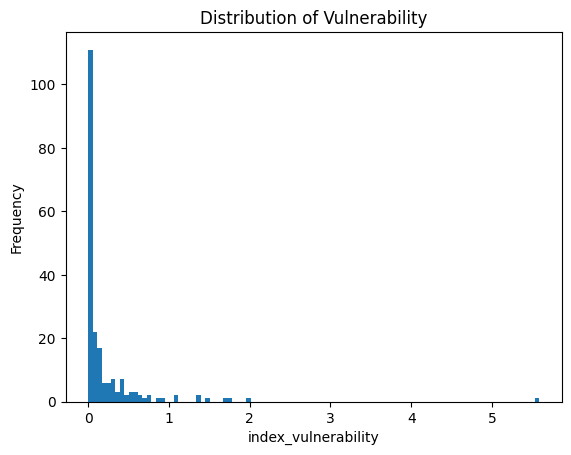

In [49]:
show_histogram(unique_roads_df_vuln_crit, 'index_vulnerability', 'Distribution of Vulnerability')

The statistics and distribution for the criticality index.

count    203.000000
mean      20.816792
std       69.763647
min        0.000000
25%        0.133174
50%        0.605413
75%       11.431923
max      676.575183
Name: index_criticality, dtype: float64


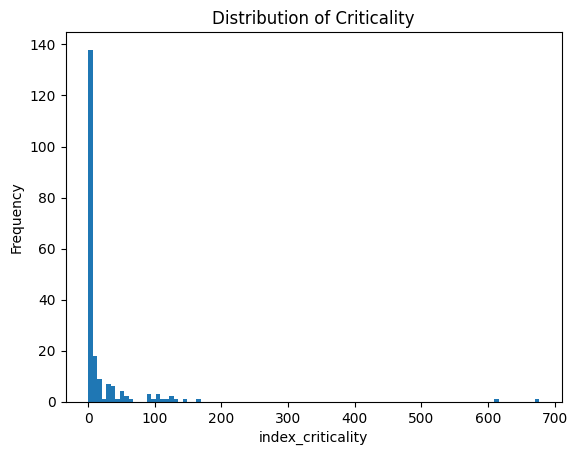

In [50]:
show_histogram(unique_roads_df_vuln_crit, 'index_criticality', 'Distribution of Criticality')


The statistics and distribution for the vulnerability times criticality index.

count    203.000000
mean       0.263994
std        2.166826
min        0.000000
25%        0.000000
50%        0.016572
75%        0.069407
max       30.517367
Name: vuln_index_times_crit_index, dtype: float64


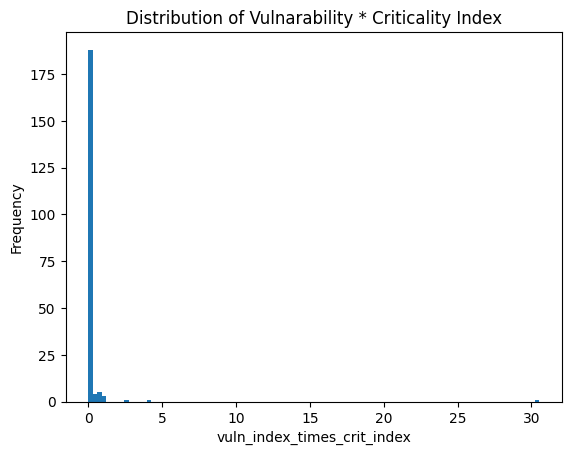

In [51]:
show_histogram(unique_roads_df_vuln_crit, 'vuln_index_times_crit_index', 'Distribution of Vulnarability * Criticality Index')

The function below plots the top 10 roads for a certain metric on a map containing all the roads of Bangladesh. The dataset containing all the roads is used for this, together with GeoPandas. To provide a good overview and a non-distracting map, only the road network of Bangladesh is plotted.

In [52]:
all_roads_gdf = gpd.read_file('_roads3.csv')

def plot_roads(roads_gdf, roads_to_plot_df):
    # The roads from a dataframe containing the top 10 roads of a certain metric are converted to a list,
    # which is later used to mark them on the map.
    roads_to_highlight = roads_to_plot_df['road'].tolist()
        
    # Geometry is applied.
    roads_gdf['lat'] = pd.to_numeric(roads_gdf['lat'])
    roads_gdf['lon'] = pd.to_numeric(roads_gdf['lon'])
    roads_gdf['geometry'] = roads_gdf.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
    roads_gdf = gpd.GeoDataFrame(roads_gdf, geometry='geometry')
    roads_gdf.crs = {'init': 'epsg:4326'} 
    
    # The LRPs of every road are used to plot lines, these lines together form the map. 
    roads_lines = roads_gdf.groupby('road').apply(lambda x: LineString(x.geometry.tolist()) if len(x.geometry) > 1 else None)
    roads_lines_gdf = gpd.GeoDataFrame(roads_lines, columns=['geometry'])
    roads_lines_gdf['road'] = roads_lines_gdf.index
    roads_lines_gdf.reset_index(drop=True, inplace=True)
    
    # All roads are plotted in gray.
    fig, ax = plt.subplots(figsize=(10, 10))
    roads_lines_gdf.plot(ax=ax, linewidth=1, color='gray')
    
    # Now the roads from the top 10 are highlighted in red.
    highlighted_roads_lines = roads_lines_gdf[roads_lines_gdf['road'].isin(roads_to_highlight)]
    highlighted_roads_lines.plot(ax=ax, linewidth=2, color='red')
    
    plt.show()

Map with top 10 roads of index criticality times vulnerability highlighted.

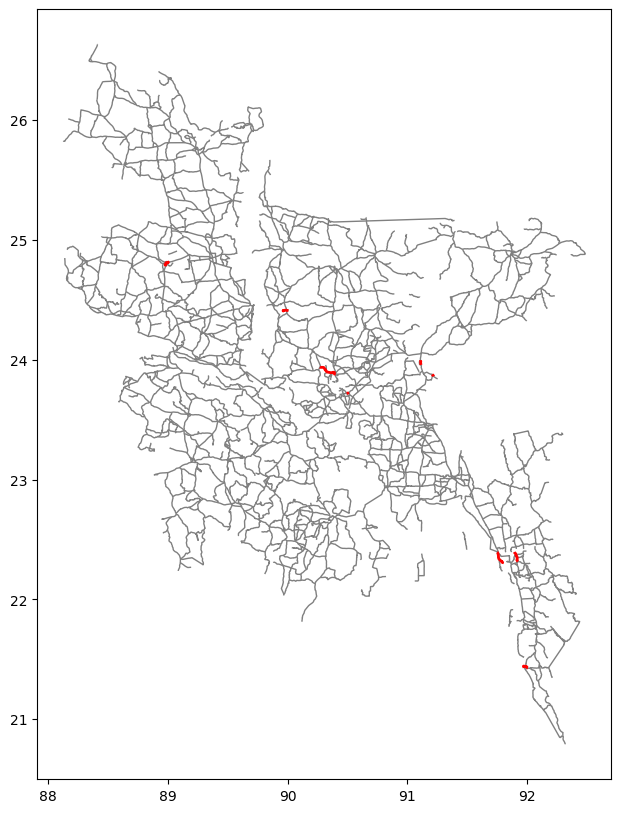

In [53]:
plot_roads(all_roads_gdf, combined_results)

Map with top 10 roads of index criticality highlighted.

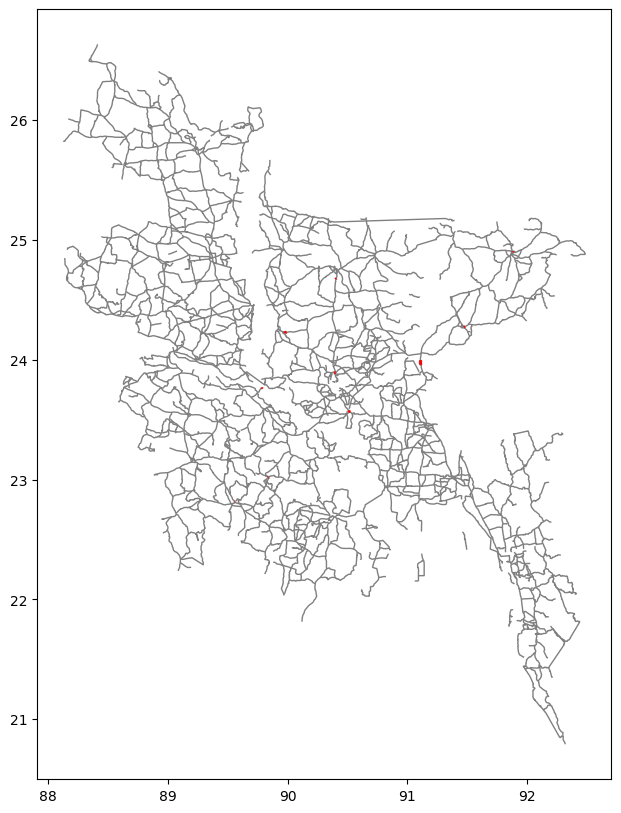

In [54]:
plot_roads(all_roads_gdf, results_criticality)

Map with top 10 roads of index vulnerability highlighted.

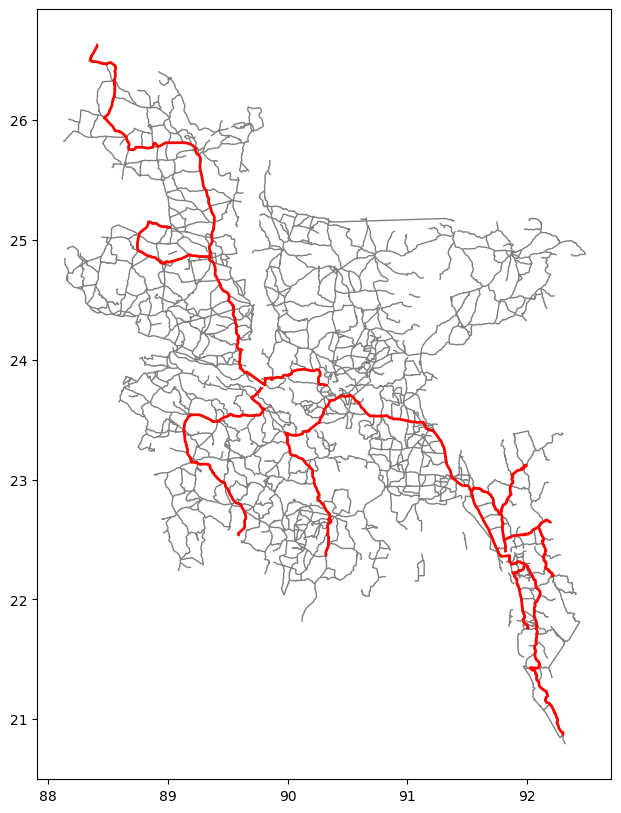

In [55]:
plot_roads(all_roads_gdf, results_vulnerability)